<span style="font-size:250%;color:blue; background:yellow"> KRONOSPAN #2</span>
    
<span style="font-size: 150%;color:#073763;background:#cfe2f3">Porządkowanie nazw w kolumnach tekstowych w giga bazach

In [1]:
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

<span style="font-size: 150%;color:#073763;background:#cfe2f3">Ustalam typy danych, 'category' jest najlepszym formatem bo potrzebuje mało pamieci 

In [2]:
dtypes = { 
     'Agency':'category',
    'Agency Name':'category',
    'Complaint Type':'category',
    'Descriptor':'category',
    'Location Type':'category',
    'Incident Address':'category',
    'Street Name':'category',
    'Cross Street 1':'category',
    'Cross Street 2':'category',
    'Intersection Street 1':'category',
    'Intersection Street 2':'category',
    'Address Type':'category',
    'City':'category',
    'Landmark':'category',
    'Facility Type':'category',
    'Status':'category',
    'Due Date':'category',
    'Resolution Description':'category',
    'Resolution Action Updated Date':'category',
    'Community Board':'category',
    'Borough':'category',
    'Park Facility Name':'category',
    'Park Borough':'category',
    'School Name':'category',
    'School Number':'category',
    'School Region':'category',
    'School Code':'category',
    'School Phone Number':'category',
    'School Address':'category',
    'School City':'category',
    'School State':'category',
    'School Zip':'category',
    'School Not Found':'category',
    'Taxi Pick Up Location':'category',
    'Location':'category',
    
    'Incident Zip': 'category',
'X Coordinate (State Plane)': 'float32',
'Y Coordinate (State Plane)': 'float32',
'School or Citywide Complaint': 'category',
'Vehicle Type': 'category',
'Taxi Company Borough': 'category',
'Bridge Highway Name': 'category',
'Bridge Highway Direction': 'category',
'Road Ramp': 'category',
'Bridge Highway Segment':'category',
'Garage Lot Name': 'category',
'Ferry Direction': 'category',
'Ferry Terminal Name': 'category',
'Latitude': 'float32',
'Longitude': 'float32' }

giga_plik = '/media/wojciech/D6DE33C1DE3399271/2/311_Service_Requests_from_2011.csv'
parse_dates = ['Created Date','Closed Date']

<span style="font-size: 150%;color:#073763;background:#cfe2f3">Teraz otwieramy cała bazę

In [3]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu

giga_plik = '/media/wojciech/D6DE33C1DE3399271/2/311_Service_Requests_from_2011.csv'
parse_dates = ['Created Date','Closed Date']

df3 = pd.read_csv(giga_plik, dtype = dtypes , parse_dates=parse_dates)

print('minutes: ',
(time.time() - start_time)/60) ## koniec pomiaru czasu


minutes:  5.780107915401459


In [4]:
print("Łączne zużycie pamięci: ",round((df3.memory_usage(deep=True).sum())/1000000), 'MB')

Łączne zużycie pamięci:  471.0 MB


<span style="font-size: 150%;color:#073763;background:#cfe2f3">Ile jest duplikatów

In [5]:
df3.duplicated().sum()

0

<span style="font-size: 150%;color:#073763;background:#cfe2f3">Pokazanie wierszy z duplikatami (przez loc)

In [6]:
df3.loc[df3.duplicated(),:]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location


<span style="font-size: 150%;color:#073763;background:#cfe2f3"> Usuwamy pierwsze duplikaty

In [7]:
df3.drop_duplicates(keep='first', inplace=True)

In [8]:
print("Łączne zużycie pamięci: ",round((df3.memory_usage(deep=True).sum())/1000000), 'MB')

Łączne zużycie pamięci:  487.0 MB


<span style="font-size: 150%;color:#073763;background:#cfe2f3">Sprawdzam braki w danych

In [9]:
df3.isnull().sum()

Unique Key                              0
Created Date                            0
Closed Date                        138423
Agency                                  0
Agency Name                             0
Complaint Type                          0
Descriptor                          12883
Location Type                      499115
Incident Zip                       119132
Incident Address                   460561
Street Name                        460679
Cross Street 1                     394564
Cross Street 2                     403914
Intersection Street 1             1589272
Intersection Street 2             1589260
Address Type                        61316
City                               117631
Landmark                          1915902
Facility Type                     1577809
Status                                  1
Due Date                          1253757
Resolution Description              36333
Resolution Action Updated Date      22421
Community Board                   

<span style="font-size: 150%;color:#073763;background:#cfe2f3">Sprawdzam braki w danych - wykres gęstości

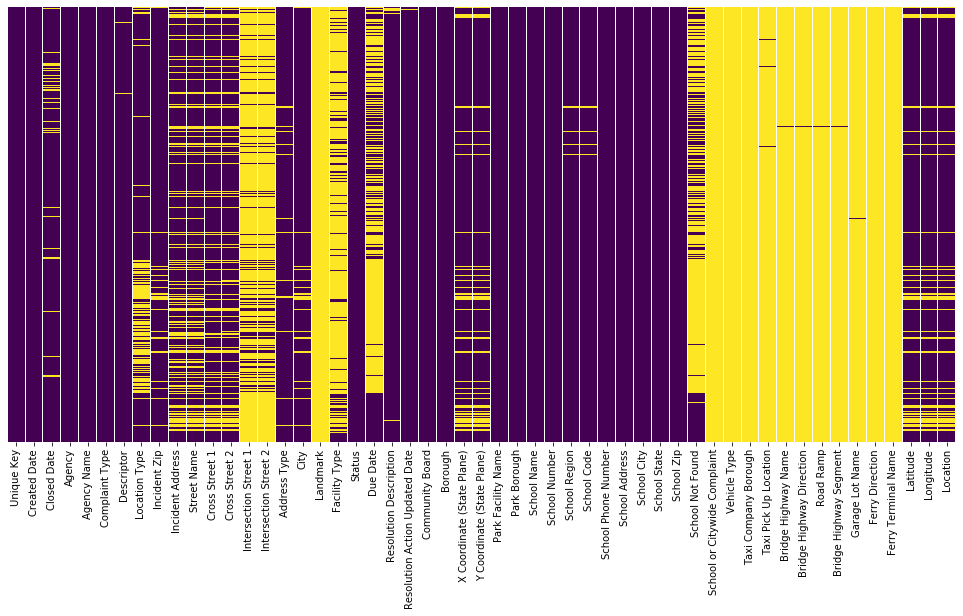

In [10]:
import seaborn as sns
plt.figure(figsize=(17,8))
sns.heatmap(df3.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
df3.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [12]:
df3[['Community Board','City','Landmark','School Region','Complaint Type']]

,Community Board,City,Landmark,School Region,Complaint Type
0,0 Unspecified,NaN,NaN,Unspecified,Taxi Compliment
1,04 MANHATTAN,NEW YORK,NaN,Unspecified,Lead
2,0 Unspecified,NaN,NaN,Unspecified,Taxi Compliment
3,08 MANHATTAN,NEW YORK,NaN,Unspecified,Lead
4,05 BROOKLYN,BROOKLYN,NaN,Unspecified,Lead
...,...,...,...,...,...
1917207,10 BROOKLYN,BROOKLYN,NaN,Unspecified,Noise - Residential
1917208,15 BROOKLYN,BROOKLYN,NaN,Unspecified,Noise - Residential
1917209,05 MANHATTAN,NEW YORK,NaN,Unspecified,Noise - Residential
1917210,09 MANHATTAN,NEW YORK,NaN,Unspecified,Non-Emergency Police Matter


<span style="font-size: 150%;color:#073763;background:#cfe2f3">Sprawdzam jakich zgłoszeń było najwięcej

In [13]:
kot4= df3['Complaint Type'].value_counts(normalize=True, dropna = False).reset_index()
kot4.style.format({'Complaint Type': "{:.2%}"})


,index,Complaint Type
0,HEATING,9.92%
1,GENERAL CONSTRUCTION,6.95%
2,PLUMBING,5.91%
3,Noise - Residential,5.79%
4,Street Condition,5.46%
5,Street Light Condition,5.28%
6,PAINT - PLASTER,5.25%
7,NONCONST,3.57%
8,Water System,3.21%
9,Blocked Driveway,2.73%


<span style="font-size: 150%;color:#073763;background:#cfe2f3"> Chcemy zobaczyć w jakich godzinach w miesiącach była ilość incydentów 

In [14]:
df3.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,19574549,2011-01-11 15:47:18,2011-07-05 16:08:01,TLC,Correspondence - Taxi and Limousine Commission,Taxi Compliment,Driver Compliment,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19579718,2011-01-11 03:00:00,NaT,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Residential) (L10),NaN,10011,226 WEST 20 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.742622,-73.997971,"(40.74262244714865, -73.99796826857371)"


In [15]:
df3['Year'] = df3['Created Date'].dt.year
df3['Month'] = df3['Created Date'].dt.month
df3['Weekday Name'] = df3['Created Date'].dt.weekday_name
df3['Hour'] = df3['Created Date'].dt.hour
df3['Minutes'] = df3['Created Date'].dt.minute

In [16]:
df3['Hour'].value_counts()

0     705177
11    101389
10    100259
13     99074
14     95451
9      89745
15     84958
12     83605
16     72766
18     56445
8      56322
17     53601
19     48754
22     41672
21     39406
20     39258
23     35907
7      31261
1      20691
2      17864
6      14969
3       9818
5       9468
4       9352
Name: Hour, dtype: int64

In [17]:
df3['Hour'] = df3['Hour'].apply(lambda x: 24 if x == 0 else x)

In [18]:
df3['Hour'].value_counts()

24    705177
11    101389
10    100259
13     99074
14     95451
9      89745
15     84958
12     83605
16     72766
18     56445
8      56322
17     53601
19     48754
22     41672
21     39406
20     39258
23     35907
7      31261
1      20691
2      17864
6      14969
3       9818
5       9468
4       9352
Name: Hour, dtype: int64

<span style="font-size: 150%;color:#073763;background:#cfe2f3">Robimy zestawienie ile było incydentów według miesięcy i według godzin

In [19]:
df3.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Year,Month,Weekday Name,Hour,Minutes
0,19574549,2011-01-11 15:47:18,2011-07-05 16:08:01,TLC,Correspondence - Taxi and Limousine Commission,Taxi Compliment,Driver Compliment,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2011,1,Tuesday,15,47
1,19579718,2011-01-11 03:00:00,NaT,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Residential) (L10),NaN,10011,226 WEST 20 STREET,...,NaN,NaN,40.742622,-73.997971,"(40.74262244714865, -73.99796826857371)",2011,1,Tuesday,3,0


In [20]:
df3.pivot_table(index='Hour',columns=['Month'], values='Incident Zip', aggfunc='count').applymap('{:,.0f}'.format)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Hour,,,,,,,,,,,,
1,"1,263","1,305","1,398","1,440","1,608","1,553","1,791","1,948","2,088","1,848","1,766","1,690"
2,"1,218","1,272","1,190","1,273","1,539","1,432","1,571","1,677","1,707","1,546","1,305","1,317"
3,678,615,684,666,850,684,754,862,925,922,779,800
4,658,576,618,626,828,674,692,840,859,872,762,712
5,694,722,721,700,835,727,835,836,805,667,600,634
6,"1,084","1,147","1,218","1,067","1,133","1,307","1,353","1,462","1,199",973,"1,015",803
7,"2,549","2,951","2,737","2,142","2,409","2,831","2,512","2,190","2,183","2,004","2,100","2,138"
8,"3,859","4,786","4,795","4,024","4,406","4,976","4,331","4,732","4,251","4,001","3,795","3,264"
9,"6,173","7,078","7,415","6,289","6,948","7,503","7,147","7,147","6,784","5,848","5,718","5,467"


<span style="font-size: 100%;color:#073763;background:#cfe2f3"> Z godzinami jest coś nie tak ochroniarze zapisują sobie zdarzenia z całego dnia około 12 w nocy 

<span style="font-size: 150%;color:#073763;background:#cfe2f3">Chcemy zobaczyć ile jest typów zdarzeń

In [21]:
df3['Location Type'].value_counts().count()

120

<span style="font-size: 150%;color:#073763;background:#cfe2f3">Chcemy zobaczyć ile procentowo zajmują poszczególne miejsca zdarzeń. Liczy również braki NaN

In [22]:
kot= df3['Location Type'].value_counts(normalize=True, dropna = False).reset_index()
kot.style.format({'Location Type': "{:.2%}"})

,index,Location Type
0,RESIDENTIAL BUILDING,34.35%
1,nan,26.03%
2,Street,10.33%
3,Street/Sidewalk,7.43%
4,Residential Building/House,5.96%
5,Sidewalk,4.46%
6,Tenant Address,1.59%
7,Senior Address,1.45%
8,Property Address,1.18%
9,Club/Bar/Restaurant,0.74%


<span style="font-size: 150%;color:#073763;background:#cfe2f3">Chcemy uspujnić całość żeby było miej kategorii, żeby było łatwiej tym zarządzać. Szukamy najbardziej podobnych zdarzeń żadko występujących do tych głównych

<span style="font-size: 100%;color:#073763;background:W">Ile jest wariantów nazw 'Residential' w nazwach?

In [23]:
kot.columns = ['type','percent']
kot.style.format({'percent': "{:.2%}"})

,type,percent
0,RESIDENTIAL BUILDING,34.35%
1,nan,26.03%
2,Street,10.33%
3,Street/Sidewalk,7.43%
4,Residential Building/House,5.96%
5,Sidewalk,4.46%
6,Tenant Address,1.59%
7,Senior Address,1.45%
8,Property Address,1.18%
9,Club/Bar/Restaurant,0.74%


<span style="font-size: 150%;color:#073763;background:#cfe2f3">Możemy zobaczyc na oko ile jest podobnych nazw, które można zestandaryzować

    odrazu widać np. 'commercial','comercial' lub 'school/pre-school','school'
    
    Żeby było łatwiej można to wyświetlic alfabetycznie

In [24]:
df3['Location Type']=df3['Location Type'].astype(str)
result = set(df3['Location Type'].str.cat(sep=' ').lower().split())
print(result)

{'profit', "veterinarian's", 'park/playground', 'shop', 'or', 'nyc', 'details)', 'vendor', 'sauna', 'residential', 'dwelling', 'government/not-for', 'terminal', 'building', 'school', 'stable', '1-,', 'lot/garage', 'vacant', 'day', '(explain', 'catering', 'kitchen', 'theater', 'foreign', 'center', 'steam', 'site', 'taxi', 'public', 'building/house', 'property', 'occupancy', '(non-residential)', 'stairs', '1-2', 'condo', 'subway', 'shelter', 'k-12', 'basin/sewer', 'hall', 'tattoo', 'parking', 'fair', 'recreation', 'room', 'bar/restaurant', 'golf', '-', 'unit', 'care/nursery', 'public/unfenced', 'street', 'complaint', 'area', 'store', 'food', 'above', 'home', 'nan', 'family', 'office', 'service', 'of', 'train/bus', 'arena', '3+', 'roadway', 'bus', 'facility', 'park', 'street/curbside', 'house', 'hospital', 'club/bar/restaurant', 'exhibit', 'private', 'stop', 'other', 'worship', 'utility', 'tenant', 'single', 'permanent', 'restaurant', 'homeless', 'catch', 'school/pre-school', 'sports', 'u

<span style="font-size: 150%;color:#073763;background:#cfe2f3">Można wyświetlić wszystkie nazwy miejsc zaczynającwe się od 'S'

In [25]:
criterion = df3['Location Type'].map(lambda x: x.startswith('S'))
k1 = df3[criterion]
k1['Location Type'].unique()

array(['Street', 'Sidewalk', 'Senior Address', 'School - K-12 Public',
       'Street/Sidewalk', 'Street/Curbside', 'Street Address', 'School',
       'Store/Commercial', 'Summer Camp', 'Senior Center',
       'Street Fair Vendor', 'Sports Arena', 'School - K-12 Private',
       'School - College/University', 'Single Room Occupancy (SRO)',
       'Street and Sidewalk', 'Sauna', 'Store', 'School/Pre-School',
       'Soup Kitchen', 'Spa Pool', 'Service Provider', 'Steam Room',
       'Subway Station', 'Street Vendor'], dtype=object)

<span style="font-size: 150%;color:#073763;background:#cfe2f3"> Widać, że school pojawia sie wielokrotnie: warto by zamienić wszystkie odmiany school na 'school/pre-school'

In [26]:
df3['Location Type'] = df3['Location Type'].str.replace(r'(^.*School.*$)', 'School/pre-school')

In [29]:
criterion = df3['Location Type'].map(lambda x: x.startswith('S'))
k1 = df3[criterion]
k1['Location Type'].unique()

array(['Street', 'Sidewalk', 'Senior Address', 'School/pre-school',
       'Street/Sidewalk', 'Street/Curbside', 'Street Address',
       'Store/Commercial', 'Summer Camp', 'Senior Center',
       'Street Fair Vendor', 'Sports Arena',
       'Single Room Occupancy (SRO)', 'Street and Sidewalk', 'Sauna',
       'Store', 'Soup Kitchen', 'Spa Pool', 'Service Provider',
       'Steam Room', 'Subway Station', 'Street Vendor'], dtype=object)

<span style="font-size: 150%;color:#073763;background:#cfe2f3">Chce zobaczyć ile jest różnych nazw miejsc zdarzeń z nazwą 'Residential'
    
Jest jeden pusty rekord - gdy jest pusty rekord nie można zrobić wyselekcjonowania 


In [34]:
kot['type'].isnull().sum()

1

In [35]:
kot['type'].isnull()

0      False
1       True
2      False
3      False
4      False
       ...  
116    False
117    False
118    False
119    False
120    False
Name: type, Length: 121, dtype: bool

<span style="font-size: 120%;color:#073763;background:#cfe2f3"> Usuwanie kilku wierszy tylko, gdy brakuje wartości w wybranych kolumnach

In [37]:
kot = kot.dropna(subset=['type'], how='any')

In [38]:
kot[kot['type'].str.contains("Residential")]

,type,percent
4,Residential Building/House,0.059552
24,Residential,0.001731
39,Building (Non-Residential),0.000470
40,Residential Building,0.000451


<span style="font-size: 120%;color:#073763;background:#cfe2f3">Teraz chce zamienić te różne warianty na jeden 'RESIDENTIAL BUILDING'

In [40]:
kot['type'] = kot.type.str.replace(r'(^.*Residential.*$)', 'RESIDENTIAL BUILDING')
kot.style.format({'percent': "{:.2%}"})

/home/wojciech/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,type,percent
0,RESIDENTIAL BUILDING,34.35%
2,Street,10.33%
3,Street/Sidewalk,7.43%
4,RESIDENTIAL BUILDING,5.96%
5,Sidewalk,4.46%
6,Tenant Address,1.59%
7,Senior Address,1.45%
8,Property Address,1.18%
9,Club/Bar/Restaurant,0.74%
10,Park,0.58%


<span style="font-size: 120%;color:#073763;background:#cfe2f3">Żeby podmienić w dużej df3 wszystkie Residential trzeba najpierw zasypać puste przestrzenie

In [41]:
df3['Location Type'] = df3['Location Type'].astype(str)

In [42]:
df3['Location Type'].isnull().sum()

0

In [43]:
df3['Location Type'].fillna('no data', inplace=True)

<span style="font-size: 120%;color:#073763;background:#cfe2f3">Teraz zmieniam to w dużej bazie

In [44]:
df3['Location Type'] = df3['Location Type'].str.replace(r'(^.*Residential.*$)', 'RESIDENTIAL BUILDING')

<span style="font-size: 120%;color:#073763;background:#cfe2f3">Nie ma residential więc udało sie dobrze podmienić i zlikwidować problem

In [45]:
df3[df3['Location Type'].str.contains("Residential")]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Year,Month,Weekday Name,Hour,Minutes


<span style="font-size: 120%;color:#073763;background:#cfe2f3">Teraz Senior

In [46]:
kot[kot['type'].str.contains("Senior")]

,type,percent
7,Senior Address,0.014506
50,Senior Center,0.000152


<span style="font-size: 120%;color:#073763;background:#cfe2f3">Teraz zmieniam to w dużej bazie

In [47]:
df3['Location Type'] = df3['Location Type'].str.replace(r'(^.*Senior Center.*$)', 'Senior Address')

<span style="font-size: 120%;color:#073763;background:#cfe2f3">Stree

In [48]:
kot[kot['type'].str.contains("Stree")]

,type,percent
2,Street,1.033329e-01
3,Street/Sidewalk,7.430894e-02
16,Street Address,3.093033e-03
36,Street and Sidewalk,5.085510e-04
42,Street/Curbside,3.593760e-04
92,Street Fair Vendor,4.694317e-06
117,NYC Street Address,5.215907e-07
119,Street Vendor,5.215907e-07


In [49]:
df3[df3['Location Type'].str.contains("Stree")].head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Year,Month,Weekday Name,Hour,Minutes
11,19580965,2011-01-12 11:55:06,2011-01-20 10:09:33,TLC,Taxi and Limousine Commission,Taxi Complaint,Insurance Information Requested,Street,10036,NaN,...,NaN,NaN,40.763374,-73.996460,"(40.76337543877809, -73.99645870414689)",2011,1,Wednesday,11,55
12,19581409,2011-01-12 15:08:44,2011-01-19 15:27:25,TLC,Taxi and Limousine Commission,Taxi Complaint,Insurance Information Requested,Street,10010,NaN,...,NaN,NaN,40.740791,-73.983810,"(40.7407905784571, -73.98381155127129)",2011,1,Wednesday,15,8
33,19572861,2011-01-11 12:53:33,2011-01-18 16:59:33,TLC,Taxi and Limousine Commission,Taxi Complaint,Insurance Information Requested,Street,10002,NaN,...,NaN,NaN,40.717728,-73.985779,"(40.71772665579642, -73.98577597754645)",2011,1,Tuesday,12,53


<span style="font-size: 120%;color:#073763;background:#cfe2f3">Powinienem sobie to tak zorganizaować zeby mieć liste nazw do zmiany

In [50]:
col_one_list = kot[kot['type'].str.contains("Stree")]
a = col_one_list['type'].tolist()
a

['Street',
 'Street/Sidewalk',
 'Street Address',
 'Street and Sidewalk',
 'Street/Curbside',
 'Street Fair Vendor',
 'NYC Street Address',
 'Street Vendor']

<span style="font-size: 120%;color:#073763;background:#cfe2f3">W dużej bazie

In [53]:
df3['Location Type'] = df3['Location Type'].str.replace(r'(^.*Stree.*$)', 'Street/Sidewalk')
df3['Location Type'] = df3['Location Type'].str.replace(r'(^.*Sidewalk.*$)', 'Street/Sidewalk')

<span style="font-size: 120%;color:#073763;background:#cfe2f3">Parking

In [54]:
kot[kot['type'].str.contains("Parking")]

,type,percent
59,Parking Lot/Garage,6.467725e-05
120,Parking Lot,5.215907e-07


In [55]:
df3['Location Type'] = df3['Location Type'].str.replace(r'(^.*Parking.*$)', 'Parking Lot/Garage')

In [57]:
kot['type'] = kot.type.str.replace(r'(^.*Residential.*$)', 'RESIDENTIAL BUILDING')
kot.style.format({'percent': "{:.2%}"})

/home/wojciech/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,type,percent
0,RESIDENTIAL BUILDING,34.35%
2,Street,10.33%
3,Street/Sidewalk,7.43%
4,RESIDENTIAL BUILDING,5.96%
5,Sidewalk,4.46%
6,Tenant Address,1.59%
7,Senior Address,1.45%
8,Property Address,1.18%
9,Club/Bar/Restaurant,0.74%
10,Park,0.58%


<span style="font-size: 120%;color:#073763;background:#cfe2f3">Teraz chce zamienić te Family

bezpośrenio zamieniamy nazwy w dużej bazie

In [58]:
kot[kot['type'].str.contains("Family")]

,type,percent
12,3+ Family Apt. Building,0.004447
14,1-2 Family Dwelling,0.003699
17,3+ Family Apartment Building,0.002945
19,"1-, 2- and 3- Family Home",0.002626
29,3+ Family Mixed Use Building,0.001068
41,1-2 Family Mixed Use Building,0.000398
88,1-3 Family Dwelling,0.000007
104,1-3 Family Mixed Use Building,0.000002


In [59]:
kot['type'] = kot.type.str.replace(r'(^.*Family.*$)', 'Family Apartment Building')
kot.style.format({'percent': "{:.2%}"})

/home/wojciech/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,type,percent
0,RESIDENTIAL BUILDING,34.35%
2,Street,10.33%
3,Street/Sidewalk,7.43%
4,RESIDENTIAL BUILDING,5.96%
5,Sidewalk,4.46%
6,Tenant Address,1.59%
7,Senior Address,1.45%
8,Property Address,1.18%
9,Club/Bar/Restaurant,0.74%
10,Park,0.58%


In [60]:
df3['Location Type'] = df3['Location Type'].str.replace(r'(^.*Family.*$)', 'Family Apartment Building')

In [61]:
kot[kot['type'].str.contains("Restaurant")]

,type,percent
9,Club/Bar/Restaurant,0.007383
13,Restaurant/Bar/Deli/Bakery,0.004222
33,Bar/Restaurant,0.000623
64,Restaurant,0.000041


<span style="font-size: 120%;color:#073763;background:#cfe2f3">Teraz zamieniamy dużą ilość róznych wariantów

In [62]:
df3['Location Type'] = df3['Location Type'].str.replace(r'(^.*Restaurant.*$)', 'Restaurant/Bar/Club/Bakery')
df3['Location Type'] = df3['Location Type'].str.replace(r'(^.*Bar.*$)', 'Restaurant/Bar/Club/Bakery')
df3['Location Type'] = df3['Location Type'].str.replace(r'(^.*Bar.*$)', 'Restaurant/Bar/Club/Bakery')
df3['Location Type'] = df3['Location Type'].str.replace(r'(^.*Bar.*$)', 'Restaurant/Bar/Club/Bakery')
df3['Location Type'] = df3['Location Type'].str.replace(r'(^.*Club.*$)', 'Restaurant/Bar/Club/Bakery')
df3['Location Type'] = df3['Location Type'].str.replace(r'(^.*Bakery.*$)', 'Restaurant/Bar/Club/Bakery')
df3['Location Type'] = df3['Location Type'].str.replace(r'(^.*Deli.*$)', 'Restaurant/Bar/Club/Bakery')

Teraz sprawdzamy jak wyglądają efekty naszych starań

In [63]:
kot= df3['Location Type'].value_counts(normalize=True, dropna = False).reset_index()
kot.style.format({'Location Type': "{:.2%}"})

,index,Location Type
0,RESIDENTIAL BUILDING,40.57%
1,nan,26.03%
2,Street/Sidewalk,22.62%
3,Tenant Address,1.59%
4,Family Apartment Building,1.52%
5,Senior Address,1.47%
6,Restaurant/Bar/Club/Bakery,1.23%
7,Property Address,1.18%
8,Park,0.58%
9,Lot,0.45%


<span style="font-size: 120%;color:#073763;background:#cfe2f3"> Powiedzmy, że uporządkowaliśmy nazwy w tej tabeli zostało nam dużo nazw, które nie pasuja do niczego, powinniśmy je zapisać jako 'Other'  

Sprawdzamy ile maja znaków te nazwy

In [64]:
fok = kot[ kot['Location Type']>0.003] 
krótka_lista = fok['index'].tolist()
krótka_lista

['RESIDENTIAL BUILDING',
 'nan',
 'Street/Sidewalk',
 'Tenant Address',
 'Family Apartment Building',
 'Senior Address',
 'Restaurant/Bar/Club/Bakery',
 'Property Address',
 'Park',
 'Lot',
 'Store/Commercial']

In [65]:
import numpy as np

lista = ['RESIDENTIAL BUILDING',
 'nan',
 'Street/Sidewalk',
 'Tenant Address',
 'Family Apartment Building',
 'Senior Address',
 'Restaurant/Bar/Club/Bakery',
 'Property Address',
 'Park',
 'Lot',
 'Store/Commercial']

df3['new_List'] =np.where((df3['Location Type'].str.contains('RESIDENTIAL BUILDING')),'WOW!',df3['Location Type'])

In [66]:
df3.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Ferry Terminal Name,Latitude,Longitude,Location,Year,Month,Weekday Name,Hour,Minutes,new_List
0,19574549,2011-01-11 15:47:18,2011-07-05 16:08:01,TLC,Correspondence - Taxi and Limousine Commission,Taxi Compliment,Driver Compliment,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,2011,1,Tuesday,15,47,nan
1,19579718,2011-01-11 03:00:00,NaT,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Residential) (L10),nan,10011,226 WEST 20 STREET,...,NaN,40.742622,-73.997971,"(40.74262244714865, -73.99796826857371)",2011,1,Tuesday,3,0,nan


<span style="font-size: 180%;color:#073763;background:#cfe2f3"> Pętla szukająca wszystko co uporządkowaliśmy - chyba działa źle

In [67]:
lista2 = ['RESIDENTIAL BUILDING', 'nan', 'Street/Sidewalk', 'Tenant Address', 'Family Apartment Building',
 'Senior Address', 'Restaurant/Bar/Club/Bakery','Property Address', 'Park', 'Lot','Store/Commercial']

for i in lista2:
    df3['new_List'] = df3[df3['Location Type'].str.contains(i)]

In [69]:
df3[df3['new_List']=='RESIDENTIAL BUILDING']

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Ferry Terminal Name,Latitude,Longitude,Location,Year,Month,Weekday Name,Hour,Minutes,new_List


<span style="font-size: 180%;color:#073763;background:#cfe2f3">Lambda, która zamienia wszystkie nazwy które nie należą do zbioru lista2 jako other 

In [70]:
lista2 = ['RESIDENTIAL BUILDING', 'nan', 'Street/Sidewalk', 'Tenant Address', 'Family Apartment Building',
 'Senior Address', 'Restaurant/Bar/Club/Bakery','Property Address', 'Park', 'Lot','Store/Commercial']

df3["new_List3"] = df3['Location Type'].apply(lambda x: x if any(i in x for i in lista2) else 'Other')

In [72]:
df3['new_List3'].value_counts()

RESIDENTIAL BUILDING          777830
nan                           499115
Street/Sidewalk               433748
Other                          42424
Tenant Address                 30549
Family Apartment Building      29125
Senior Address                 28103
Restaurant/Bar/Club/Bakery     23522
Property Address               22623
Park                           11126
Lot                             8660
Store/Commercial                5991
Park/Playground                 2793
Vacant Lot                      1478
Parking Lot/Garage               125
Name: new_List3, dtype: int64

<span style="font-size: 150%;color:#073763;background:#cfe2f3"> Zapomiętuję poprawioną bazę

In [73]:
df3.to_csv('/media/wojciech/D6DE33C1DE3399271/2/311_Service_Requests_from_2011B.csv')